In [1]:
# importing essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# extacting data from file 
df=pd.read_csv(r"D:\E_commers_sells_analysis_project\archive (2)\Automobile_data.csv")

In [2]:
# reading first row of dataset
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
#knowing columns name
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [4]:
# here are shwing dataset size
df.shape

(205, 26)

In [5]:
# knowing the datatypes of dataset columns
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [6]:
# discribing the dataset in mathematical functions
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [7]:
# now checking the null values in dataset
df.isnull().sum()
# no null values in our data

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [8]:
# Find out number of records having '?' value for normalized losses
df["normalized-losses"].loc[df["normalized-losses"]=="?"].count()

np.int64(41)

In [9]:
# Setting the missing value to mean of normalized losses and conver the datatype to integer
n=df["normalized-losses"].loc[df["normalized-losses"]=="?"].count()
normal=n.astype(str).astype(int).mean()
df["normalized-losses"]=df["normalized-losses"].replace("?",normal).astype(int)
df['normalized-losses'].head()

0     41
1     41
2     41
3    164
4    164
Name: normalized-losses, dtype: int64

In [10]:
# find the price numaric and nonnumaric values
df["price"].str.isnumeric().value_counts()

price
True     201
False      4
Name: count, dtype: int64

In [11]:
# find which values are not numaric
df["price"].loc[df["price"].str.isnumeric()==False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [12]:
#Setting the missing value to mean of price and convert the datatype to integer
pr=df["price"].loc[df["price"]!="?"]
pme=pr.astype("str").astype(int).mean()
df["price"]=df["price"].replace("?",pme).astype(int)
df["price"].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

In [13]:
# Checking the numberic and replacing with mean value and conver the datatype to integer
df["horsepower"].str.isnumeric().value_counts()
hp=df["horsepower"].loc[df["horsepower"]!="?"]
hpmean=hp.astype(str).astype(int).mean()
df["price"]=df["price"].replace("?",hpmean).astype(int)


In [16]:
# cleaning bore
# finding the no of invalid values
df["bore"].loc[df['bore']=='?']

55    ?
56    ?
57    ?
58    ?
Name: bore, dtype: object

In [19]:
# Replace the non-numeric value to null and conver the datatype
df['bore'] = pd.to_numeric(df['bore'],errors='coerce')
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [20]:
# cleaning the peak rppm data 
# Convert the non-numeric data to null and convert the datatype
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'],errors='coerce')
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [21]:
# cleaning the no of doors data 
# remove the records which are having the value '?'
df['num-of-doors'].loc[df['num-of-doors'] == '?']
df = df[df['num-of-doors'] != '?']
df['num-of-doors'].loc[df['num-of-doors'] == '?']

Series([], Name: num-of-doors, dtype: object)

Text(0.5, 0, 'Make')

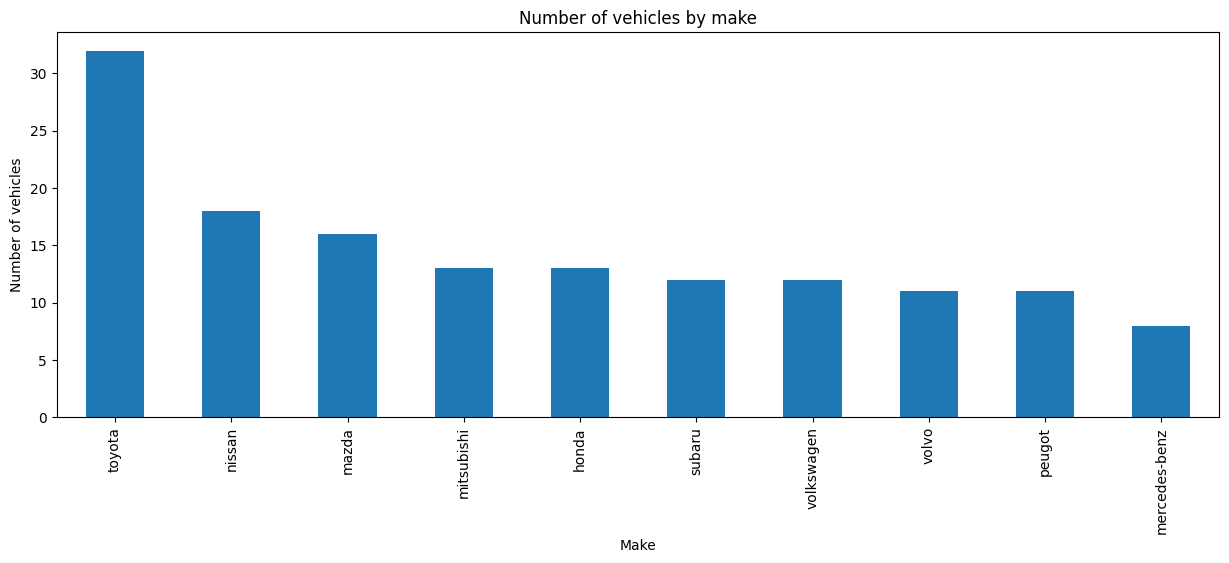

In [ ]:
# vichle making frequency diagram
df.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make')

Text(0.5, 0, 'Risk rating')

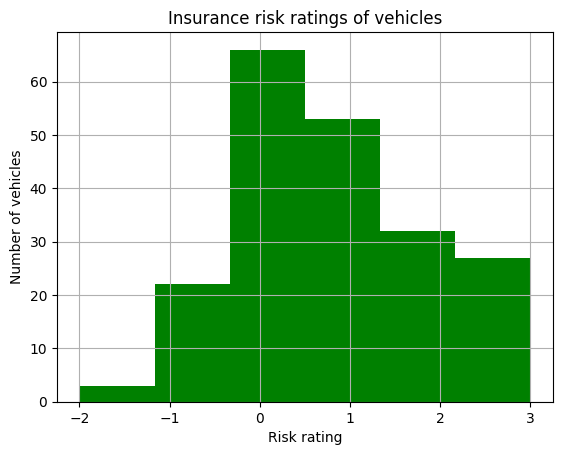

In [25]:
# insureence risk raing histogram
df.symboling.hist(bins=6,color='green')
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating')


Text(0.5, 0, 'Normalized losses')

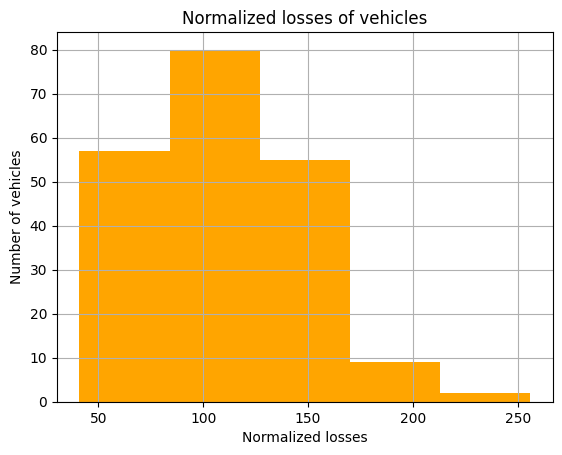

In [26]:
# normalized losses histogram
df['normalized-losses'].hist(bins=5,color='orange')
plt.title("Normalized losses of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses')


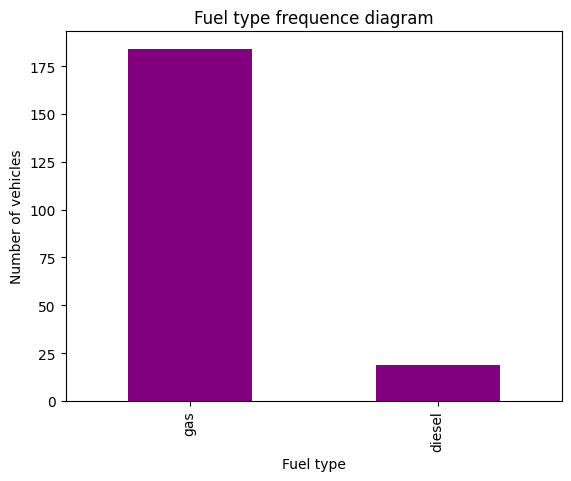

In [ ]:
# fuel type barchart
df['fuel-type'].value_counts().plot(kind='bar',color='purple')
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type')

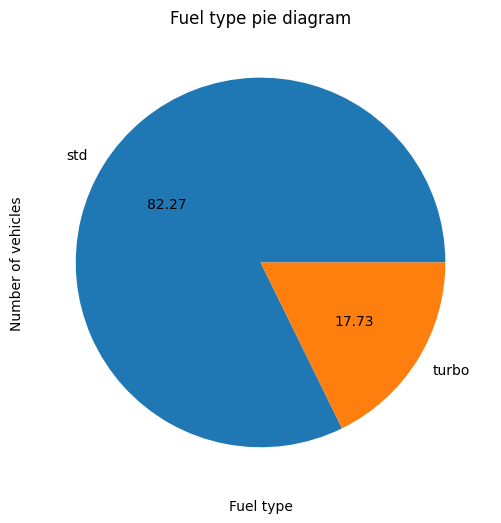

In [ ]:
# fuel type pie digram
df['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Fuel type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type')


Text(0.5, 0, 'Curb weight')

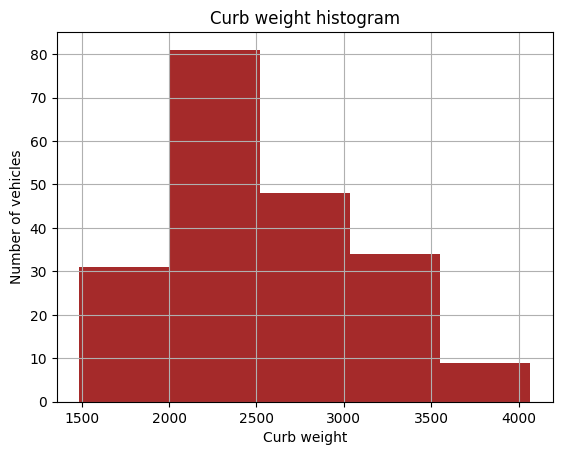

In [31]:
# curbe weight histogram
df['curb-weight'].hist(bins=5,color='brown')
plt.title("Curb weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight')

Text(0.5, 0, 'Curb weight')

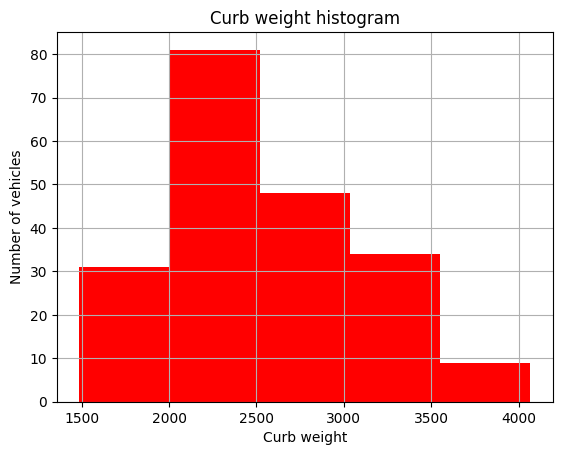

In [ ]:
# curb weight histogram
df['curb-weight'].hist(bins=5,color='red')
plt.title("Curb weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight')

Text(0.5, 0, 'Drive wheels')

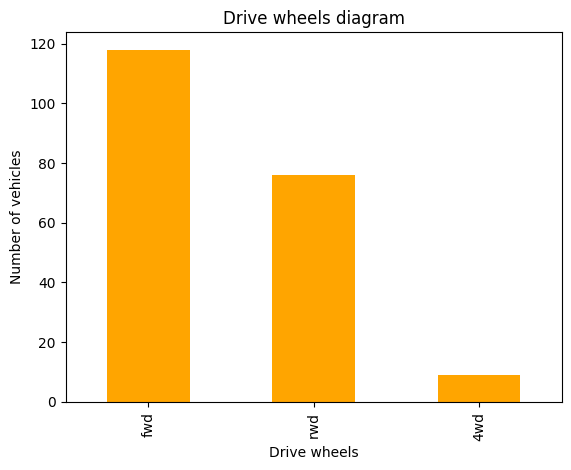

In [34]:
# drive wheels barchart
df['drive-wheels'].value_counts().plot(kind='bar',color='orange')
plt.title("Drive wheels diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels')

Text(0.5, 0, 'Number of doors')

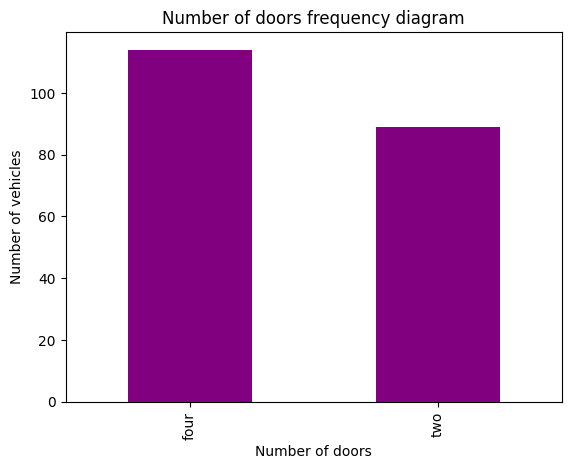

In [36]:
# Number of doors bar chart
df['num-of-doors'].value_counts().plot(kind='bar',color='purple')
plt.title("Number of doors frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors')

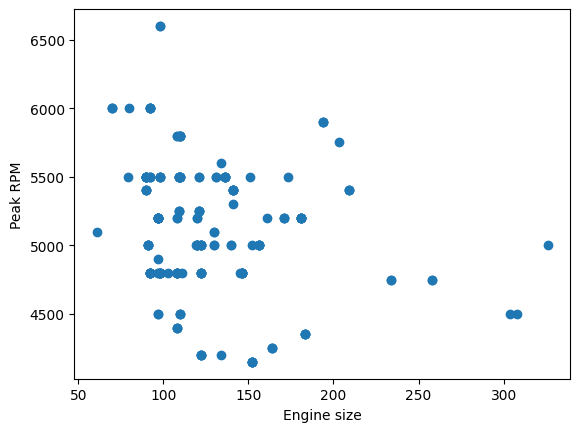

In [ ]:
# findng the relation between peak RPM an enging size
plt.scatter(df['engine-size'],df['peak-rpm'])
plt.xlabel('Engine size')
plt.ylabel('Peak RPM')

Text(0.5, 0, 'Drive wheels')

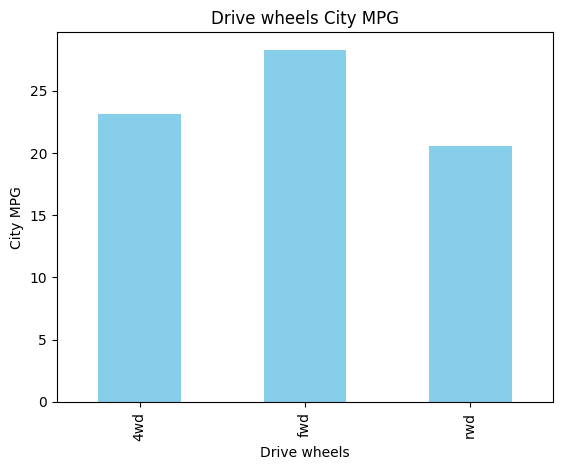

In [44]:
# Drive wheels and City miles per gallon bar chart
df.groupby('drive-wheels')['city-mpg'].mean().plot(kind='bar', color = 'skyblue')
plt.title("Drive wheels City MPG")
plt.ylabel('City MPG')
plt.xlabel('Drive wheels')


In [ ]:
# Conclusion

# Analysis of the data set provides

# How the data set are distributed
# Correlation between different fields and how they are related
# Normalized loss of the manufacturer
# Symboling : Cars are initially assigned a risk factor symbol associated with its price
# Importance of drive wheels and curb weight